In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy.stats import norm

## DATA VISUALISATION

In [4]:
data_indiv = pd.read_csv('../Datasets/Individuals/application_data.csv',sep = ',')

In [5]:
data_indiv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_indiv.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
unique_value_counts = data_indiv.nunique()
unique_value_counts

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [8]:
unique_columns = unique_value_counts[unique_value_counts == 1].index.to_list()
unique_columns

[]

In [9]:
data_indiv.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
numerical_columns = data_indiv.select_dtypes(include=['number']).columns
categorical_columns = data_indiv.select_dtypes(exclude=['number']).columns

In [11]:
numerical_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

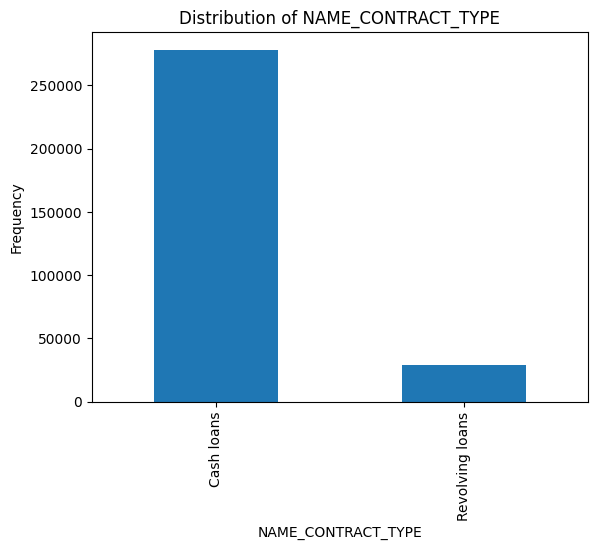

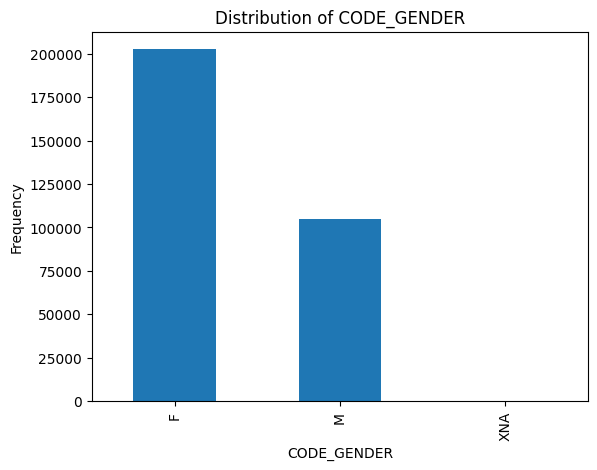

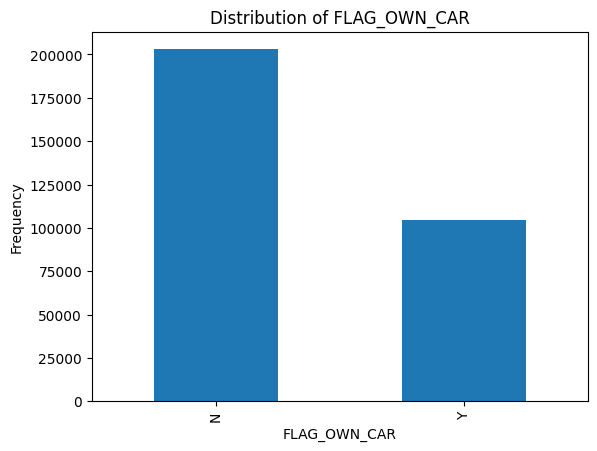

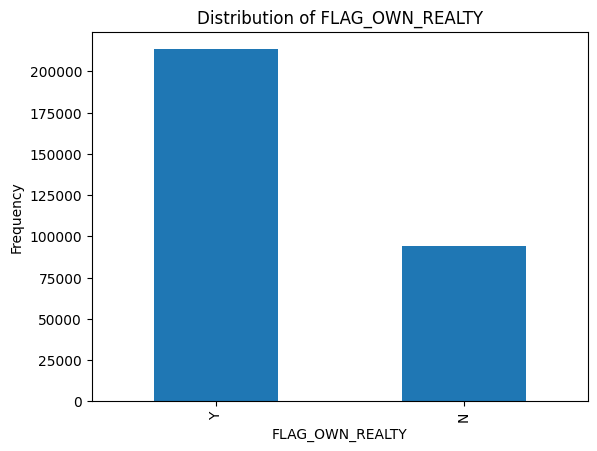

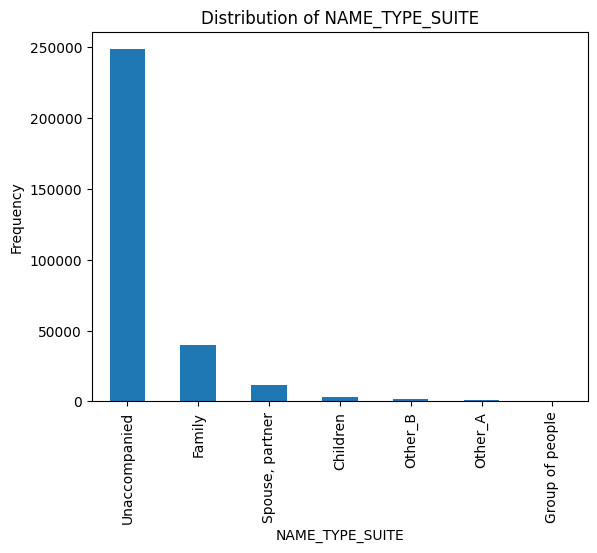

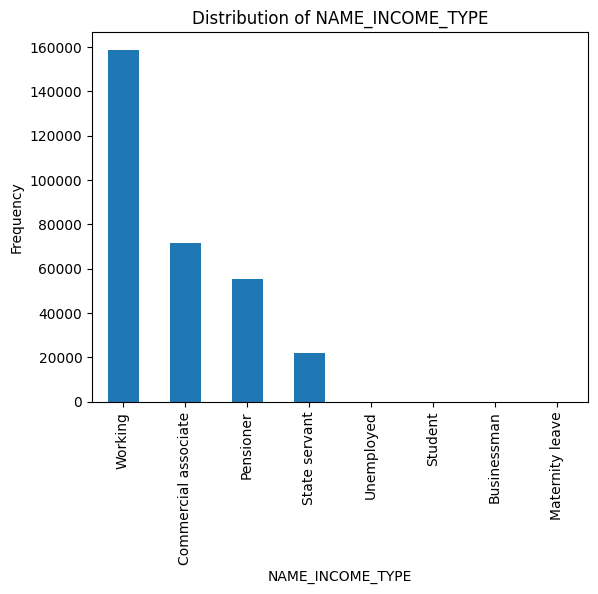

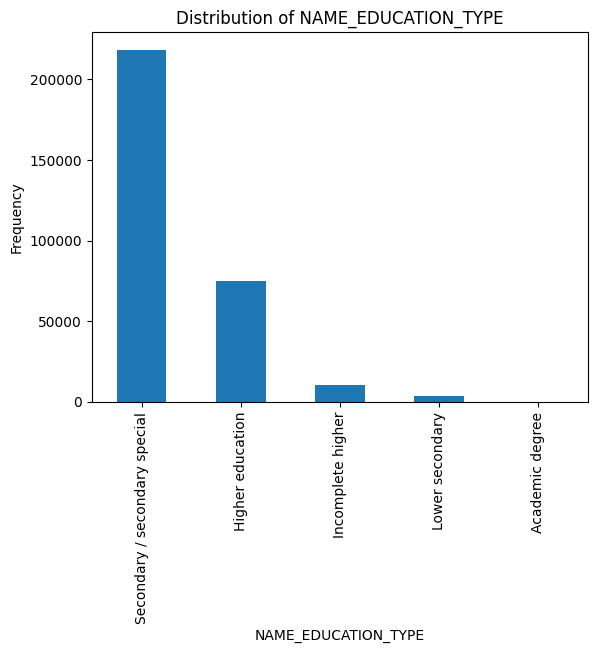

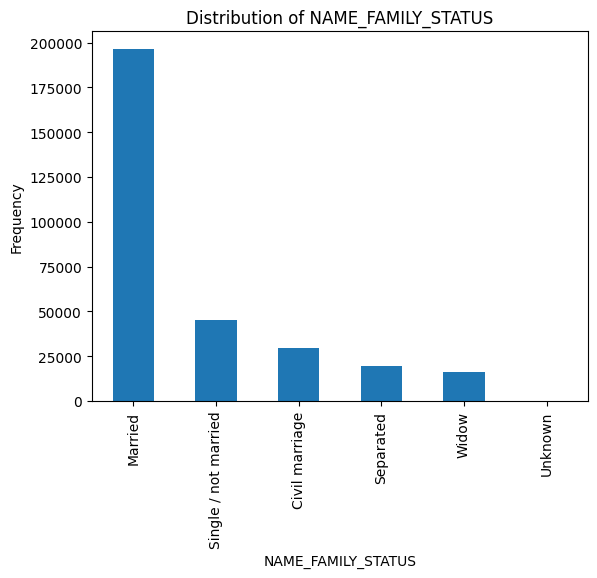

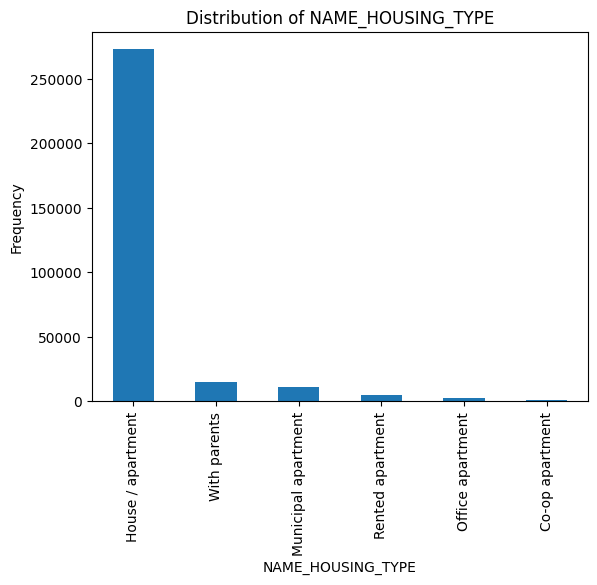

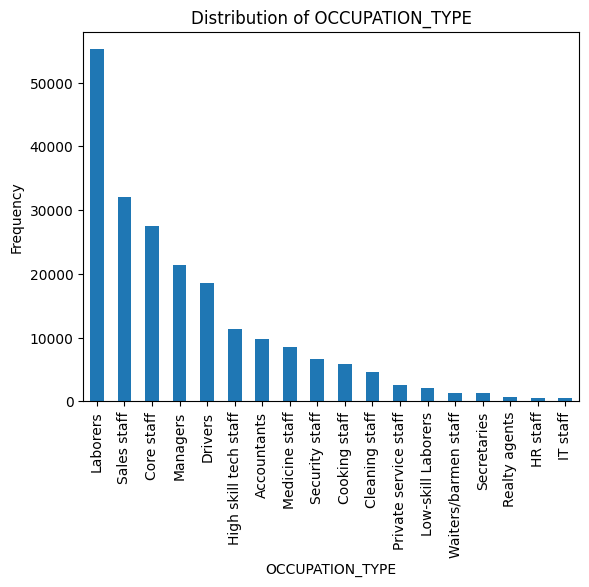

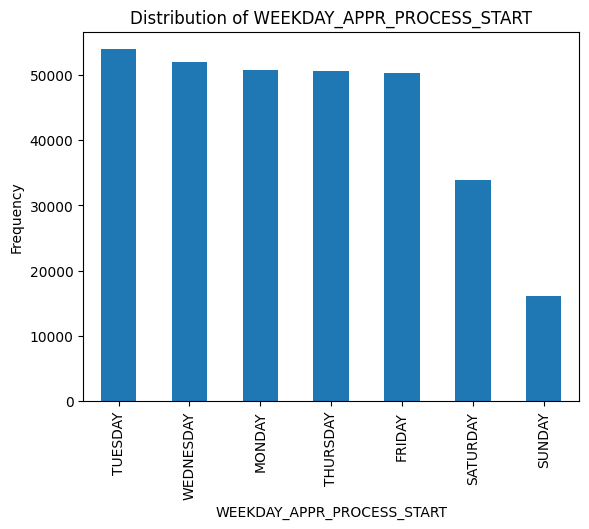

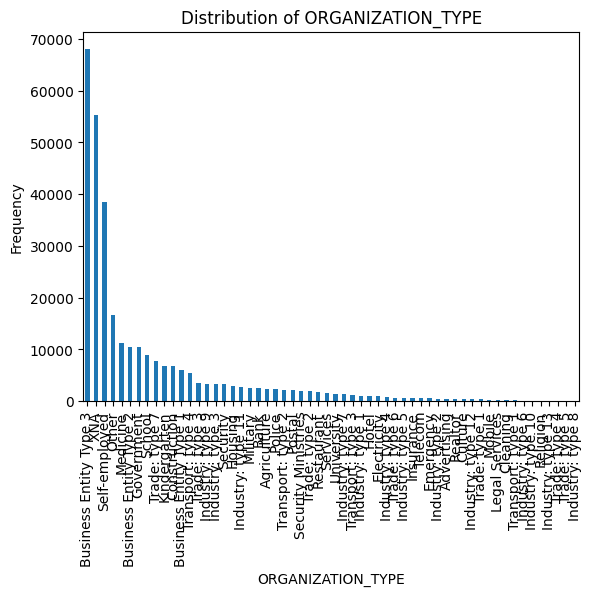

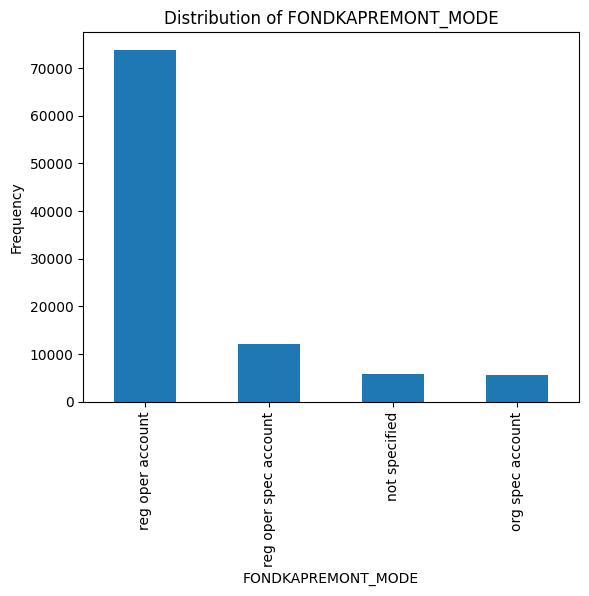

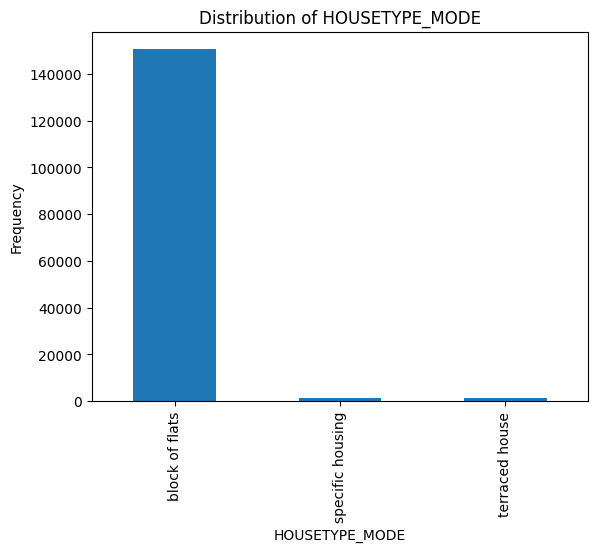

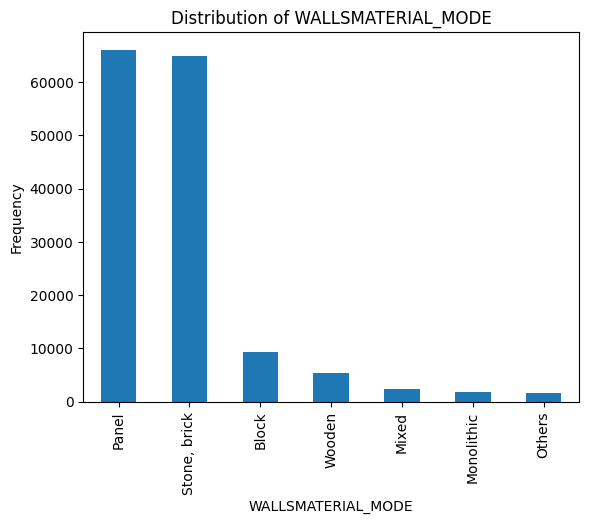

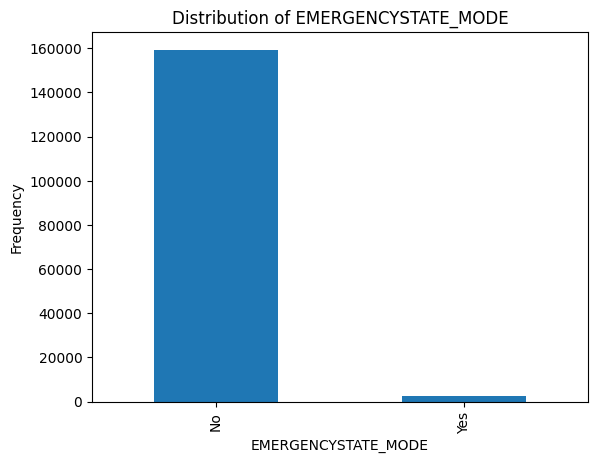

In [12]:
# Categorical columns distribution

for column in categorical_columns:
    data_indiv[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

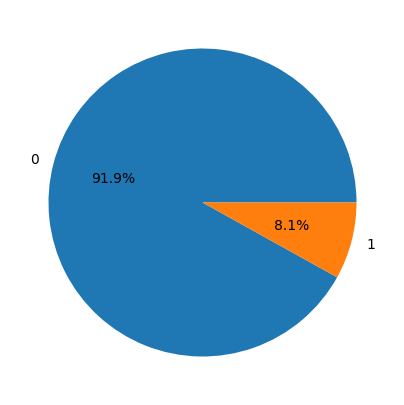

In [13]:
# Target variable distribution

values = data_indiv['TARGET'].value_counts()
plt.pie(values, labels=values.index, autopct='%1.1f%%')
plt.gcf().set_size_inches(5, 5)
plt.show()

## DATA CLEANING


In [14]:

# Check the number of columns
num_columns = len(data_indiv.columns)
print("Number of columns:", num_columns)

Number of columns: 122


In [15]:
# Extracting 'FLAG_DOCUMENT_' columns
flag_columns = [col for col in data_indiv.columns if 'FLAG_DOCUMENT_' in col]

# Calculating total documents submitted for each person
data_indiv['TOTAL_DOCUMENTS_SUBMITTED'] = data_indiv[flag_columns].sum(axis=1)

# Drop the individual document flag columns if needed
data_indiv.drop(columns=flag_columns, inplace=True)



In [16]:
# Check the 'TOTAL_DOCUMENTS_SUBMITTED' column
total_submitted_column = data_indiv['TOTAL_DOCUMENTS_SUBMITTED']

# Print the first few entries of the column
print(total_submitted_column.head())

# Alternatively, you can print the summary statistics of the column
print(total_submitted_column.describe())

0    1
1    1
2    0
3    1
4    1
Name: TOTAL_DOCUMENTS_SUBMITTED, dtype: int64
count    307511.000000
mean          0.930155
std           0.344295
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: TOTAL_DOCUMENTS_SUBMITTED, dtype: float64


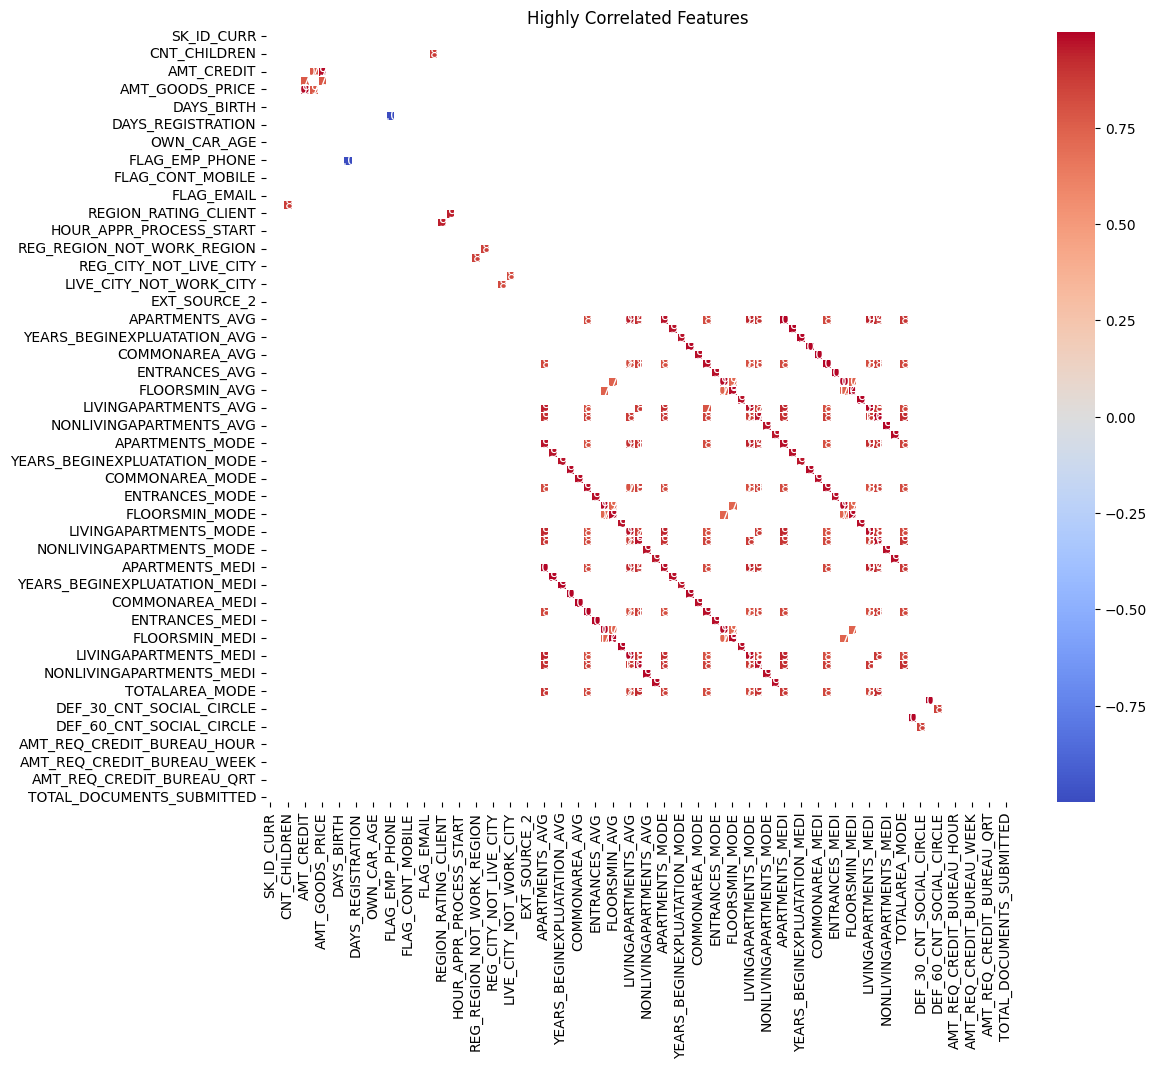

In [17]:

# Select only numeric columns
numeric_data = data_indiv.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Set a threshold for highly correlated features
threshold = 0.7  # Adjust as needed

# Filter the correlation matrix to include only highly correlated features
highly_correlated = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)

# Apply the filter to the correlation matrix
highly_correlated_matrix = correlation_matrix[highly_correlated]

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(highly_correlated_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Highly Correlated Features')

# Show plot
plt.show()

In [18]:
# Initialize a dictionary to store correlated variables for each variable
correlated_variables_dict = {}

# Iterate through the correlation matrix and collect correlated variables for each variable
for col in highly_correlated.columns:
    correlated_vars = list(highly_correlated[col][highly_correlated[col]].index)
    if correlated_vars:
        correlated_variables_dict[col] = correlated_vars

# Print the dictionary of correlated variables
for var, correlated_vars in correlated_variables_dict.items():
    print(f"{var}: {correlated_vars}")

CNT_CHILDREN: ['CNT_FAM_MEMBERS']
AMT_CREDIT: ['AMT_ANNUITY', 'AMT_GOODS_PRICE']
AMT_ANNUITY: ['AMT_CREDIT', 'AMT_GOODS_PRICE']
AMT_GOODS_PRICE: ['AMT_CREDIT', 'AMT_ANNUITY']
DAYS_EMPLOYED: ['FLAG_EMP_PHONE']
FLAG_EMP_PHONE: ['DAYS_EMPLOYED']
CNT_FAM_MEMBERS: ['CNT_CHILDREN']
REGION_RATING_CLIENT: ['REGION_RATING_CLIENT_W_CITY']
REGION_RATING_CLIENT_W_CITY: ['REGION_RATING_CLIENT']
REG_REGION_NOT_WORK_REGION: ['LIVE_REGION_NOT_WORK_REGION']
LIVE_REGION_NOT_WORK_REGION: ['REG_REGION_NOT_WORK_REGION']
REG_CITY_NOT_WORK_CITY: ['LIVE_CITY_NOT_WORK_CITY']
LIVE_CITY_NOT_WORK_CITY: ['REG_CITY_NOT_WORK_CITY']
APARTMENTS_AVG: ['ELEVATORS_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'ELEVATORS_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'APARTMENTS_MEDI', 'ELEVATORS_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'TOTALAREA_MODE']
BASEMENTAREA_AVG: ['BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI']
YEARS_BEGINEXPLUATATION_AVG: ['YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGIN

In [19]:
# Remove the highly corrolated columns
data = data_indiv.drop(columns=['REGION_RATING_CLIENT','LIVE_REGION_NOT_WORK_REGION','REG_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY','CNT_CHILDREN','AMT_GOODS_PRICE','AMT_ANNUITY','FLAG_EMP_PHONE','ELEVATORS_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'ELEVATORS_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'APARTMENTS_MEDI', 'ELEVATORS_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'TOTALAREA_MODE','BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI','COMMONAREA_MODE', 'COMMONAREA_MEDI','ENTRANCES_MODE', 'ENTRANCES_MEDI','FLOORSMIN_AVG', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI','LANDAREA_MODE', 'LANDAREA_MEDI','NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'])

In [20]:
# Initialize a dictionary to store highly correlated variables for each variable
correlated_variables_dict = {}

# Iterate through the correlation matrix and store highly correlated variables
for col in highly_correlated_matrix.columns:
    # Exclude NaN values and select only highly correlated variables
    correlated_vars = list(highly_correlated_matrix[col].dropna().index)
    if col in correlated_vars:
        correlated_vars.remove(col)  # Remove the variable itself from the list if it exists
    # Store the list of highly correlated variables in the dictionary
    correlated_variables_dict[col] = correlated_vars

# Print the dictionary
for variable, correlated_vars in correlated_variables_dict.items():
    print(f"{variable}: {correlated_vars}")


SK_ID_CURR: []
TARGET: []
CNT_CHILDREN: ['CNT_FAM_MEMBERS']
AMT_INCOME_TOTAL: []
AMT_CREDIT: ['AMT_ANNUITY', 'AMT_GOODS_PRICE']
AMT_ANNUITY: ['AMT_CREDIT', 'AMT_GOODS_PRICE']
AMT_GOODS_PRICE: ['AMT_CREDIT', 'AMT_ANNUITY']
REGION_POPULATION_RELATIVE: []
DAYS_BIRTH: []
DAYS_EMPLOYED: ['FLAG_EMP_PHONE']
DAYS_REGISTRATION: []
DAYS_ID_PUBLISH: []
OWN_CAR_AGE: []
FLAG_MOBIL: []
FLAG_EMP_PHONE: ['DAYS_EMPLOYED']
FLAG_WORK_PHONE: []
FLAG_CONT_MOBILE: []
FLAG_PHONE: []
FLAG_EMAIL: []
CNT_FAM_MEMBERS: ['CNT_CHILDREN']
REGION_RATING_CLIENT: ['REGION_RATING_CLIENT_W_CITY']
REGION_RATING_CLIENT_W_CITY: ['REGION_RATING_CLIENT']
HOUR_APPR_PROCESS_START: []
REG_REGION_NOT_LIVE_REGION: []
REG_REGION_NOT_WORK_REGION: ['LIVE_REGION_NOT_WORK_REGION']
LIVE_REGION_NOT_WORK_REGION: ['REG_REGION_NOT_WORK_REGION']
REG_CITY_NOT_LIVE_CITY: []
REG_CITY_NOT_WORK_CITY: ['LIVE_CITY_NOT_WORK_CITY']
LIVE_CITY_NOT_WORK_CITY: ['REG_CITY_NOT_WORK_CITY']
EXT_SOURCE_1: []
EXT_SOURCE_2: []
EXT_SOURCE_3: []
APARTMENTS_AVG: [

C:\Users\marwe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\marwe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


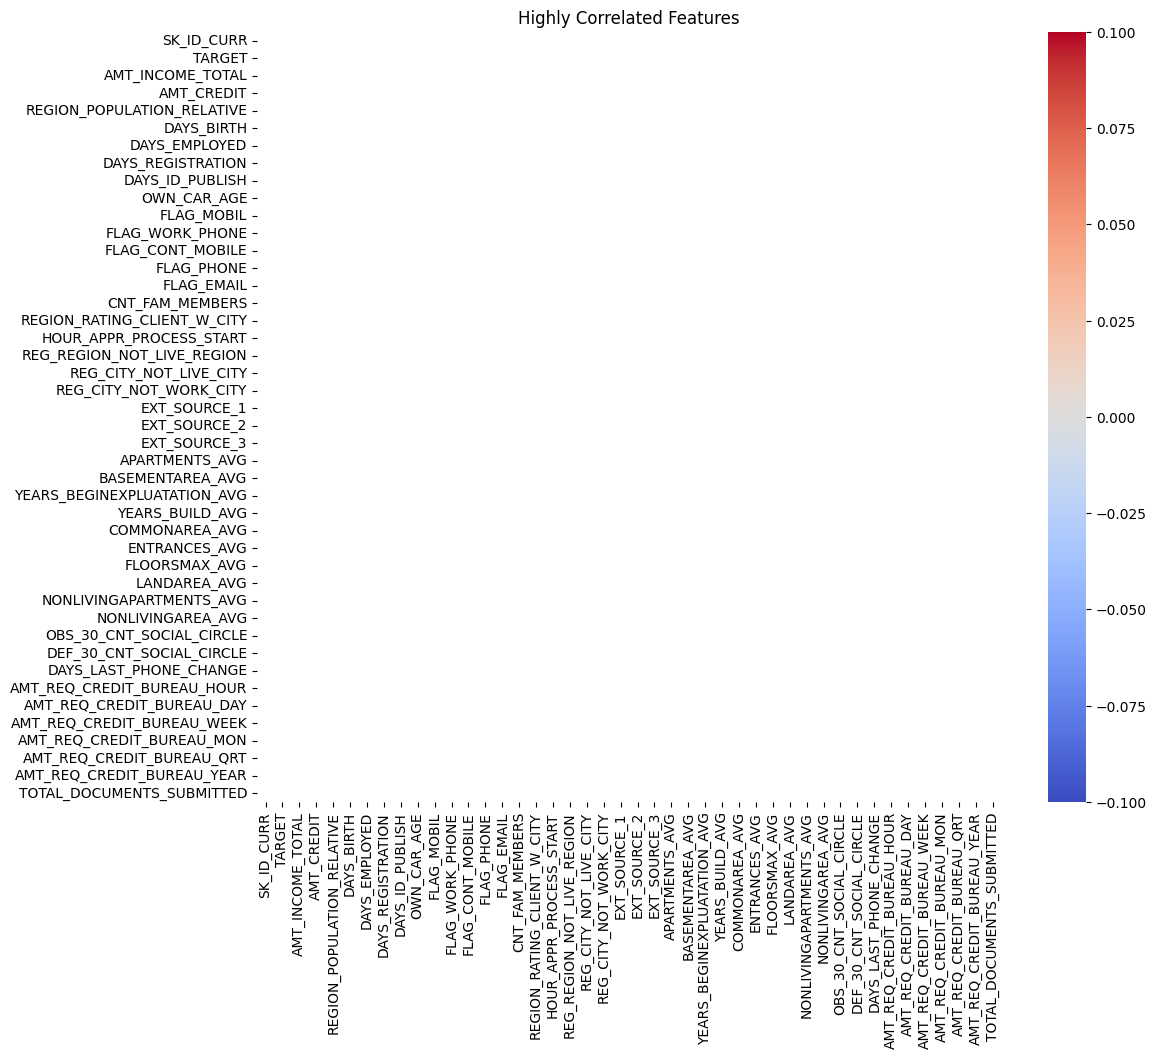

In [21]:

# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Set a threshold for highly correlated features
threshold = 0.7  # Adjust as needed

# Filter the correlation matrix to include only highly correlated features
highly_correlated = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)

# Apply the filter to the correlation matrix
highly_correlated_matrix = correlation_matrix[highly_correlated]

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(highly_correlated_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Highly Correlated Features')

# Show plot
plt.show()

In [22]:
# Check the number of columns
num_columns = len(data.columns)
print("Number of columns:", num_columns)

Number of columns: 60


In [23]:
column_list = data.columns.tolist()
print(column_list)


['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', '

In [24]:
# Check for columns with only one unique value
columns_with_one_value = data.columns[data.nunique() == 1]

# Print the columns with only one unique value
print("Columns with only one unique value:")
print(columns_with_one_value)

Columns with only one unique value:
Index([], dtype='object')


In [25]:
# Remove the irrelevant columns
data = data.drop(columns=['NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','DAYS_REGISTRATION'	,'DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','SK_ID_CURR', 'OWN_CAR_AGE','FLAG_WORK_PHONE','FLAG_PHONE','OCCUPATION_TYPE','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE','DAYS_LAST_PHONE_CHANGE'])

In [26]:
# Check the number of columns
num_columns = len(data.columns)
print("Number of columns:", num_columns)

Number of columns: 30


In [27]:
# Create a new column by summing the values across all the specified columns
data['TOTAL_REQ_CREDIT_BUREAU'] = data['AMT_REQ_CREDIT_BUREAU_HOUR'] + \
                                  data['AMT_REQ_CREDIT_BUREAU_DAY'] + \
                                  data['AMT_REQ_CREDIT_BUREAU_WEEK'] + \
                                  data['AMT_REQ_CREDIT_BUREAU_MON'] + \
                                  data['AMT_REQ_CREDIT_BUREAU_QRT'] + \
                                  data['AMT_REQ_CREDIT_BUREAU_YEAR']

# Drop the individual columns if needed
data.drop(columns=['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
                   'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], inplace=True)

In [28]:
# Calculate the mean of the three scores and create a new column
data['EXT_SOURCE_MEAN'] = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
data.drop(columns=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], inplace=True)

FLAG_MOBIL Did client provide mobile phone (1=YES, 0=NO)
FLAG_CONT_MOBILE Was mobile phone reachable (1=YES, 0=NO)
FLAG_EMAIL Did client provide email (1=YES, 0=NO)

In [29]:

data['REACHABLE'] = (data['FLAG_MOBIL'] & data['FLAG_CONT_MOBILE'] & data['FLAG_EMAIL']).astype(int)
# Now you have a new column 'REACHABLE' containing 1 if all three conditions are met, and 0 otherwise
data.drop(columns=['FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_EMAIL'], inplace=True)

In [30]:
# Calculate total number of observations
data['TOTAL_SOCIAL_OBSERVATIONS'] = (
    data['OBS_30_CNT_SOCIAL_CIRCLE'] +
    data['DEF_30_CNT_SOCIAL_CIRCLE']
)

# Drop the individual columns
data.drop(columns=['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE'], inplace=True)


In [31]:
data.drop(columns=['REACHABLE', 'TOTAL_SOCIAL_OBSERVATIONS'], inplace=True)

In [32]:
# Check the number of columns
num_columns = len(data.columns)
print("Number of columns:", num_columns)

Number of columns: 18


In [33]:
data.describe()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,TOTAL_DOCUMENTS_SUBMITTED,TOTAL_REQ_CREDIT_BUREAU,EXT_SOURCE_MEAN
count,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,265992.000000,307339.000000
mean,0.080729,1.687979e+05,5.990260e+05,0.020868,-16036.995067,63815.045904,2.152665,0.930155,2.480608,0.509251
std,0.272419,2.371231e+05,4.024908e+05,0.013831,4363.988632,141275.766519,0.910682,0.344295,2.288329,0.149802
min,0.000000,2.565000e+04,4.500000e+04,0.000290,-25229.000000,-17912.000000,1.000000,0.000000,0.000000,0.000006
25%,0.000000,1.125000e+05,2.700000e+05,0.010006,-19682.000000,-2760.000000,2.000000,1.000000,1.000000,0.413648
50%,0.000000,1.471500e+05,5.135310e+05,0.018850,-15750.000000,-1213.000000,2.000000,1.000000,2.000000,0.524502
75%,0.000000,2.025000e+05,8.086500e+05,0.028663,-12413.000000,-289.000000,3.000000,1.000000,4.000000,0.622819
max,1.000000,1.170000e+08,4.050000e+06,0.072508,-7489.000000,365243.000000,20.000000,4.000000,262.000000,0.878903


In [34]:
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,TOTAL_DOCUMENTS_SUBMITTED,TOTAL_REQ_CREDIT_BUREAU,EXT_SOURCE_MEAN
0,1,Cash loans,M,N,Y,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,1.0,1,1.0,0.161787
1,0,Cash loans,F,N,N,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,2.0,1,0.0,0.466757
2,0,Revolving loans,M,Y,Y,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,1.0,0,0.0,0.642739
3,0,Cash loans,F,N,Y,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,2.0,1,NaN,0.650442
4,0,Cash loans,M,N,Y,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,1.0,1,0.0,0.322738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,157500.0,254700.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,1.0,1,NaN,0.413601
307507,0,Cash loans,F,N,Y,72000.0,269550.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,1.0,1,NaN,0.115992
307508,0,Cash loans,F,N,Y,153000.0,677664.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,1.0,1,3.0,0.499536
307509,1,Cash loans,F,N,Y,171000.0,370107.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,2.0,1,0.0,0.587593


## DATA PREPARATION


In [35]:
# Check for missing values in the entire DataFrame
missing_values = data.isna().sum()
# Print the missing values count for each column
print(missing_values)

TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
CNT_FAM_MEMBERS                   2
TOTAL_DOCUMENTS_SUBMITTED         0
TOTAL_REQ_CREDIT_BUREAU       41519
EXT_SOURCE_MEAN                 172
dtype: int64


In [36]:
# Impute missing values in numerical columns
data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].median(), inplace=True)
data['EXT_SOURCE_MEAN'].fillna(data['EXT_SOURCE_MEAN'].mean(), inplace=True)

In [38]:
# data['TOTAL_SOCIAL_OBSERVATIONS'].fillna(0, inplace=True)
data['TOTAL_REQ_CREDIT_BUREAU'].fillna(0, inplace=True)


In [39]:
# Check for missing values in the entire DataFrame
missing_values = data.isna().sum()
# Print the missing values count for each column
print(missing_values)

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
CNT_FAM_MEMBERS               0
TOTAL_DOCUMENTS_SUBMITTED     0
TOTAL_REQ_CREDIT_BUREAU       0
EXT_SOURCE_MEAN               0
dtype: int64


In [40]:
# Select only numerical columns excluding the target variable
numerical_columns = data.drop(columns=['TARGET']).select_dtypes(include=['number']).columns

# Calculate the IQR for each numerical column
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers using the IQR method
outliers = ((data[numerical_columns] < (Q1 - threshold * IQR)) | (data[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()
print("Number of outliers:", num_outliers)


Number of outliers: 130850


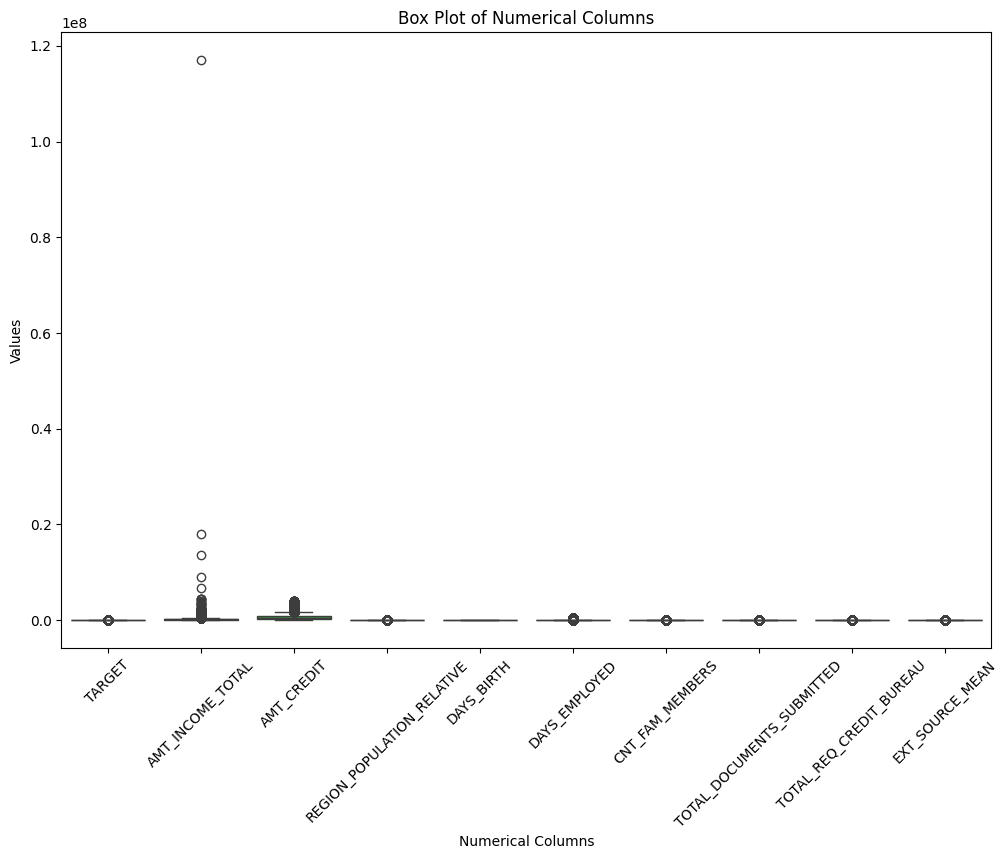

In [41]:
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['number'])

# Create box plots for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_columns)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.show()

In [42]:
#rmove outliers
cleaned_data = data[~outliers]

Shape of original data: (307511, 18)
Shape of data without outliers: (176661, 18)


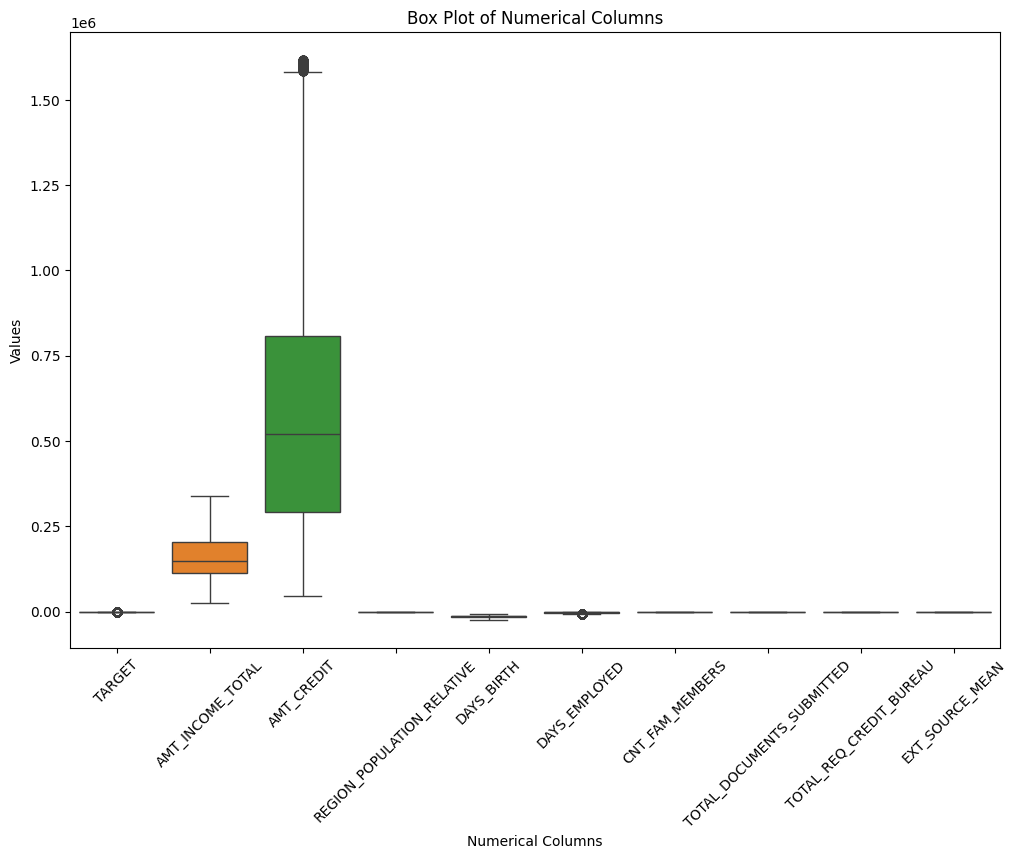

In [43]:
# Display the shape of the original and cleaned dataframes
print("Shape of original data:", data.shape)
print("Shape of data without outliers:", cleaned_data.shape)
# Select only numerical columns
numerical_columns1 = cleaned_data.select_dtypes(include=['number'])

# Create box plots for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_columns1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.show()

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define your features (X) and target variable (y)
X = cleaned_data.drop(columns=['TARGET'])  # Assuming 'TARGET' is your target variable
y = cleaned_data['TARGET']

# Define column transformer to handle categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

# Initialize the model you want to use for feature selection
model = LogisticRegression(max_iter=1000)  # You can use any model suitable for your data

# Create a pipeline with preprocessing and RFE
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('rfe', RFE(estimator=model, n_features_to_select=10))])

# Fit pipeline to your data
pipeline.fit(X, y)

# Get the selected features
selected_features = pipeline.named_steps['rfe'].support_

# Get the selected feature names
selected_columns = X.columns[pipeline.named_steps['rfe'].support_[:len(X.columns)]]

# Print the selected feature names
print("Selected Feature Names:")
print(selected_columns)

Selected Feature Names:
Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'TOTAL_REQ_CREDIT_BUREAU'], dtype='object')
